# About
Morphological transformations are operations applied on binary or grayscale images. They help to:
* Remove noise
* Shrink
* Separate an object
* Identify an object
* Increase an object size
* Increase Background space

Image Morphology is helpful to identify process text, documents, and shapes like lines and boxes.

# Libraries

In [1]:
using Images, TestImages, ImageMorphology

# User-Defined Functions

In [2]:
function load_local_or_test(image_path, local_train = "l")
    """
    The input defines if this function will load a local image or one from TestImages library
    
    Input:
    * local_train: If it contains a value "t", the function will load a test image. Default is a local image
    * image_path: Path for image location, or name of test image.
    """
    
    # Loading local or test image
    if local_train == "t"
        img = testimage(image_path);
    else 
        img = load(image_path);
    end
end;

In [3]:
function mosaic_output_1d(img_left, img_right, mosaic)
    """    
    Input:
    * img_left: Original image
    * img_right: New and processed image
    * mosaic: Boolean parameter defining if this function will return either a mosaic of two images side by side or a single image
    
    """
    if mosaic
        return mosaicview(img_left, img_right; nrow = 1)
    else 
        return img_right
    end
end;

# Image Adjustment

# Image binarization
Binary images are represented only by either 1 (white) or 0 (black). They can be obtained by a simple threshold. They are distorted by noise or texture.

In [4]:
# load an image and first convert to grayscale and then binarize
function binarize_image(image_path, condition, binary_threshold, local_train = "l", mosaic = true)

    """
    Inputs:
    * local_train: "l" or anything else
    * condition: {"<", ">", "<-", ">=", "=="}
    """    
    
    img = load_local_or_test(image_path, local_train)
    
    if condition == "<"
        img_binary = Gray.(1 * Gray.(img) .< binary_threshold)
        
    elseif condition == ">"
        img_binary = Gray.(1 * Gray.(img) .> binary_threshold)
        
    elseif condition == "<="
        img_binary = Gray.(1 * Gray.(img) .<= binary_threshold)
        
    elseif condition == ">="
        img_binary = Gray.(1 * Gray.(img) .>= binary_threshold)
        
    elseif condition == "=="
        img_binary = Gray.(1 * Gray.(img) .== binary_threshold)        
    end

    return mosaic_output_1d(1 * img, img_binary, mosaic)
    
end;

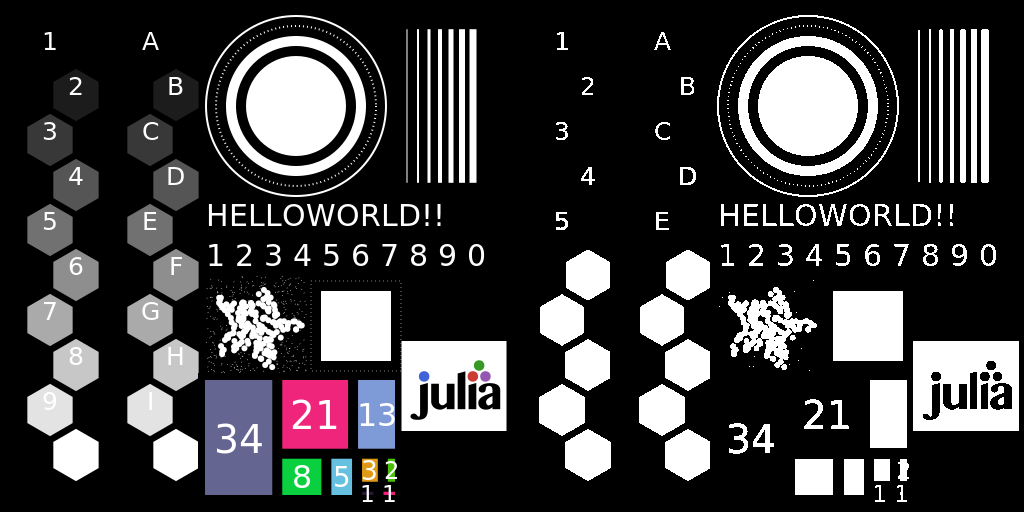

In [5]:
binarize_image("morphology_test_512", ">", 0.5, "t", true)

# Mathematical Morphology: Image Erosion
Erosion is the process for shrinking and smoothing an image, removing small objects. It can be used for object separation.

In [6]:
function erode_image(image_path, condition, binary_threshold, num_erosions, local_train = "l", mosaic = true)

    # Loading local or test image
    img = load_local_or_test(image_path, local_train)
    
    binarized_img = binarize_image(image_path, condition, binary_threshold, local_train, false)
    
    binarized_img = erode(binarized_img)
    
    if num_erosions > 1
        for i in 2:num_erosions 
            binarized_img = erode(binarized_img)
        end
    end
        
    return mosaic_output_1d(img, binarized_img, mosaic)
    
end;

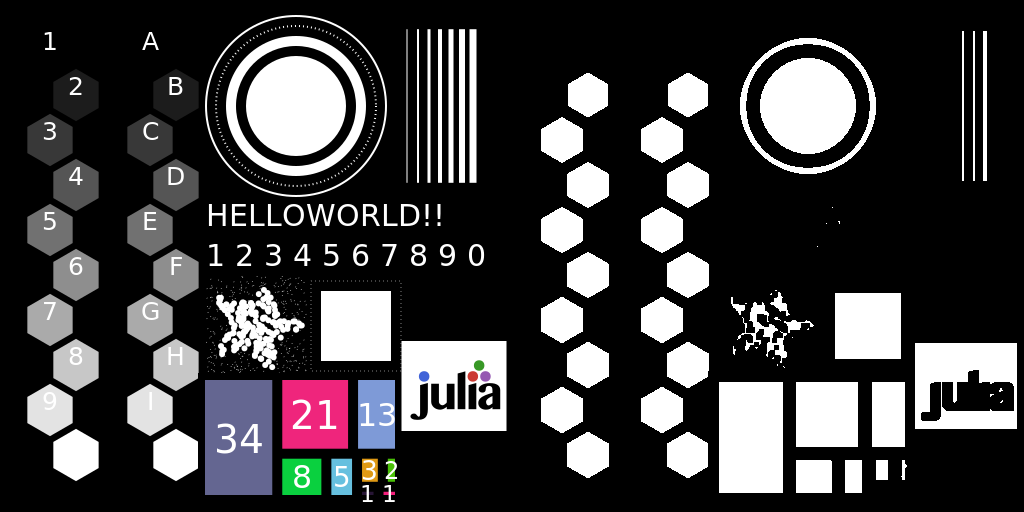

In [7]:
erode_image("morphology_test_512", ">", 0.1, 2, "t", true)

# After 4 erosions all the noise dissapeared.

# Erosion Example: Image preparation for text recognition
We continue appling erosion to an image to separate text from the background. 

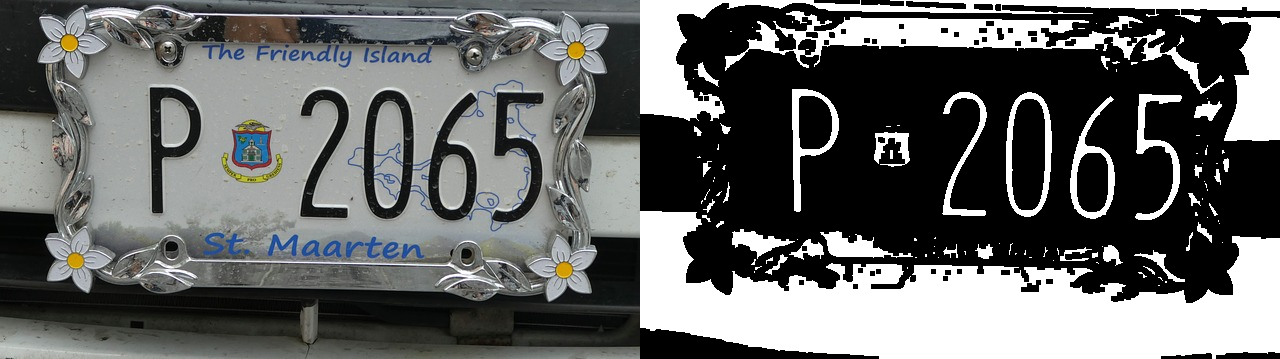

In [8]:
erode_image("Images/caribbean-plate.jpg", "<", 0.5, 2)

# After 2 erosions, no other text is left on the image. This is helpful for text recognition activities.

# Mathematical Morphology: Image Dilation
Image dilation gradually enlarges boundaries of regions of foreground pixels. Areas of foreground pixels grow in size, smoothing objet boundaries and closing holes and gaps between objects.

In [9]:
function dilate_image(image_path, condition, binary_threshold, num_dilations, local_train = "l", mosaic = true)

    # Loading local or test image
    img = load_local_or_test(image_path, local_train)
    
    binarized_img = binarize_image(image_path, condition, binary_threshold, local_train, false)
    
    binarized_img = dilate(binarized_img)
    
    if num_dilations > 1
        for i in 2:num_dilations 
            binarized_img = dilate(binarized_img)
        end
    end
        
    return mosaic_output_1d(img, binarized_img, mosaic)
    
end;

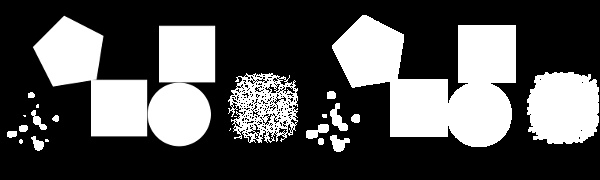

In [10]:
dilate_image("Images/geometrical-figures-and-noise.jpg", ">", 0.5, 1)

# Dilation Example: Highlighting details
Erosion separated the number plate digits. Dilation will extend the borders of every object.

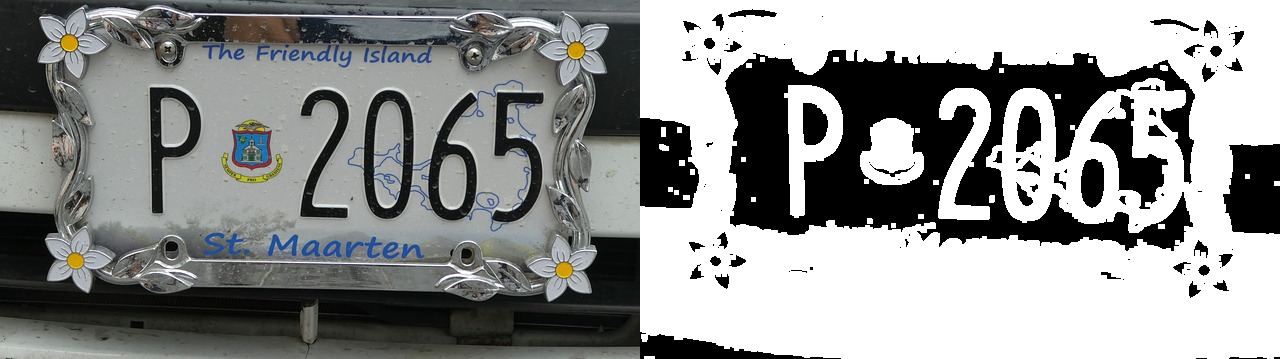

In [23]:
dilate_image("Images/caribbean-plate.jpg", "<", 0.5, 2)

# MM Operators: Opening
Dilation of the erosion

In [12]:
function opening_image(image_path, condition, binary_threshold, local_train = "l", mosaic = true)

    # Loading local or test image
    img = load_local_or_test(image_path, local_train)
    
    binarized_img = binarize_image(image_path, condition, binary_threshold, local_train, false)
    
    binarized_img = opening(binarized_img)
            
    return mosaic_output_1d(img, binarized_img, mosaic)
    
end;

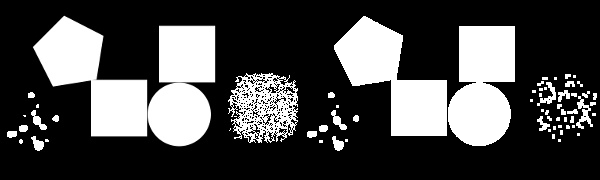

In [13]:
opening_image("Images/geometrical-figures-and-noise.jpg", ">", 0.5)
# Opening doesn't run > 1

# MM Operators: Closing
Erosion of the dilation

In [14]:
function closing_image(image_path, condition, binary_threshold, local_train = "l", mosaic = true)

    # Loading local or test image
    img = load_local_or_test(image_path, local_train)
    
    binarized_img = binarize_image(image_path, condition, binary_threshold, local_train, false)
    
    binarized_img = closing(binarized_img)
        
    return mosaic_output_1d(img, binarized_img, mosaic)
    
end;

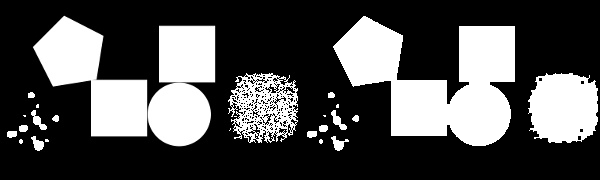

In [15]:
closing_image("Images/geometrical-figures-and-noise.jpg", ">", 0.5)

# Morphology: Top-hat and bottom-hat filters
To get small details in an image. 

## Top-hat filter
Enhances *bright* objects of interest on a *dark* background. It transforms an image by substracting a result from running an **opening** function from the original image. 

In [16]:
function tophat_image(img, mosaic = true)

    
    grayscale_img = Gray.(img);
    
    grayscale_img = tophat(grayscale_img)
        
    return mosaic_output_1d(img, grayscale_img, mosaic)
    
end;

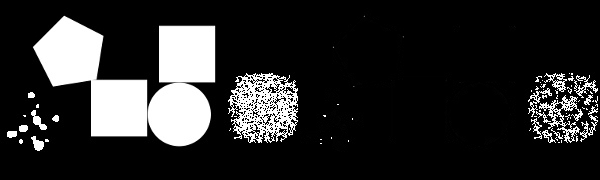

In [17]:
image_path = "Images/geometrical-figures-and-noise.jpg"
img = load_local_or_test(image_path);
tophat_image(img)

## Bottom-hat filter
Enhances *dark* objects of interest on a *light* background. It transforms an image by substracting a result from running an **closing** function from the original image. 

In [18]:
function bottomhat_image(img, mosaic = true)

    # Loading local or test image
    grayscale_img = Gray.(img);
    
    grayscale_img = bothat(grayscale_img)
        
    return mosaic_output_1d(img, grayscale_img, mosaic)
    
end;

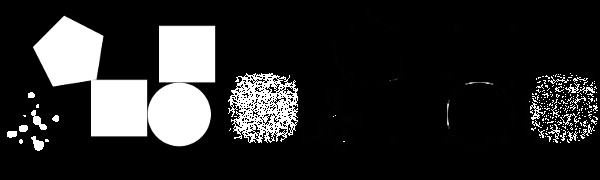

In [19]:
image_path = "Images/geometrical-figures-and-noise.jpg"
img = load_local_or_test(image_path);
bottomhat_image(img)